In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

In [4]:
df = pd.read_csv("data_analysis/hospital_simulation.csv")

In [5]:
df.head()

,Patient ID,Symptom,Severity,Arrival Time,Departure Time
0,460,2.0,0,0.0,NaN
1,461,1.0,2,0.0,NaN
2,462,2.0,1,0.0,NaN
3,463,2.0,2,0.0,NaN
4,464,0.0,1,0.0,NaN


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient ID,55297.0,5461.910067,2887.874831,460.000,2960.000000,5468.000000,7963.000000,10459.000000
Symptom,44715.0,1.695762,1.452050,0.000,1.000000,1.000000,2.000000,4.000000
Severity,55297.0,1.059171,0.826561,0.000,0.000000,1.000000,2.000000,2.000000
Arrival Time,55297.0,44.635275,47.595124,0.000,4.706820,37.647516,59.659139,406.664683
Departure Time,35297.0,80.364554,61.687622,13.098,38.007619,60.666509,96.824104,463.059353


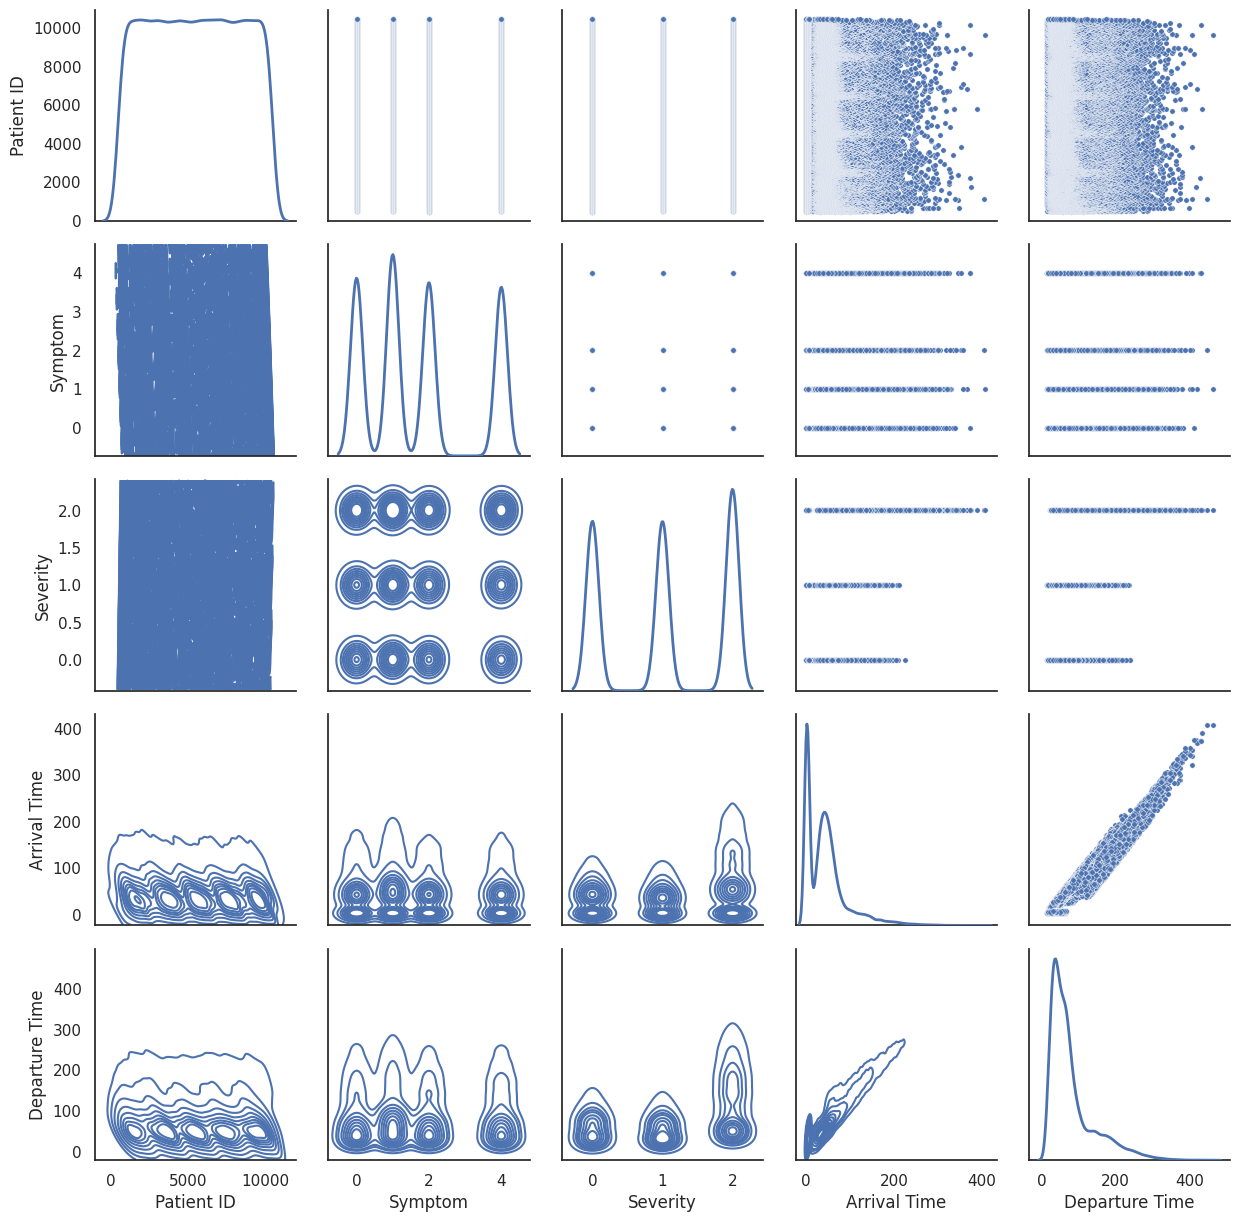

In [7]:
g = sns.PairGrid(df,diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

<Axes: >

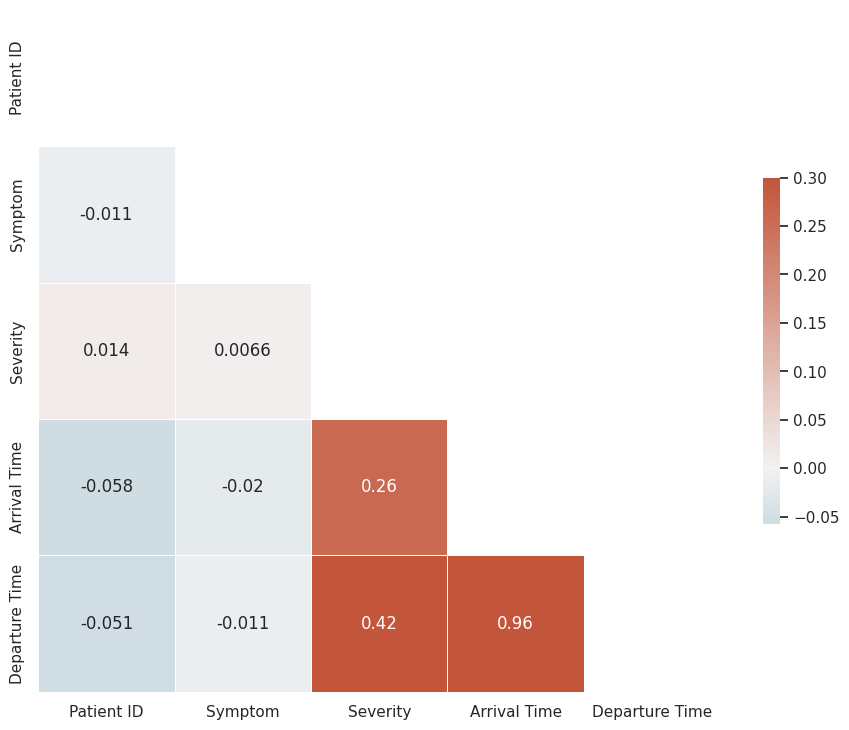

In [8]:
# Compute the correlation matrix
corr = df.loc[:, ~df.columns.isin(['xopt', 'obj_fun', 'Best solution'])].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
corr.loc['Departure Time']

Patient ID       -0.051209
Symptom          -0.010860
Severity          0.421406
Arrival Time      0.964851
Departure Time    1.000000
Name: Departure Time, dtype: float64

<Axes: xlabel='Departure Time', ylabel='Severity'>

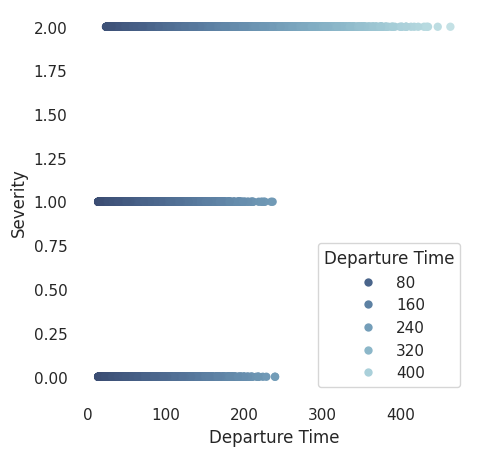

In [10]:
f, ax = plt.subplots(figsize=(5, 5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Departure Time", y="Severity",
                hue="Departure Time", 
                #size="depth",
                palette="ch:r=-.2,d=.3_r",
                #hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df[['Severity', 'Departure Time']], ax=ax)

/home/cunef/Descargas/practica ENGLISH/practica ENGLISH/myenv/lib/python3.12/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  f.tight_layout()


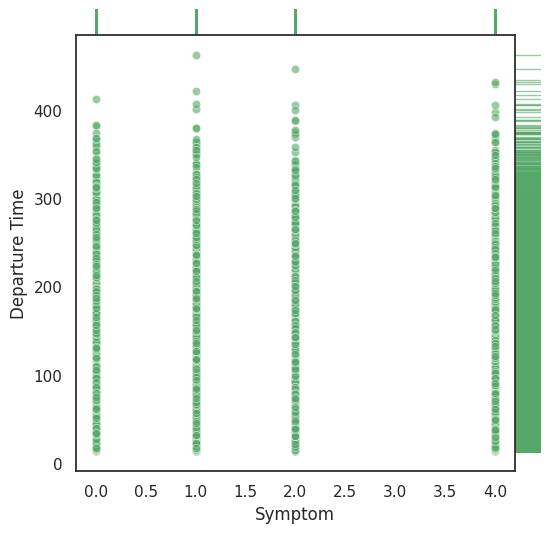

In [11]:
g = sns.JointGrid(data=df[['Symptom', 'Departure Time']], x="Symptom", y="Departure Time", space=0, ratio=17)
g.plot_joint(sns.scatterplot, #size=mpg["horsepower"], 
            sizes=(30, 120),
            color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

In [12]:
df.groupby('Symptom').min()['Departure Time']

Symptom
0.0    13.112028
1.0    13.350183
2.0    13.280952
4.0    13.380472
Name: Departure Time, dtype: float64

In [13]:
df.groupby('Patient ID').min()['Departure Time']

Patient ID
460      56.879083
461      50.485096
462      31.656652
463      70.858361
464      86.715282
           ...    
10455    16.859532
10456    22.472784
10457    21.613168
10458    24.794294
10459    30.888357
Name: Departure Time, Length: 10000, dtype: float64

In [14]:
df[df['Departure Time']==df['Departure Time'].min()].sort_values('Departure Time', ascending = True)

,Patient ID,Symptom,Severity,Arrival Time,Departure Time
11761,2588,NaN,1,3.016789,13.098
